In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [8]:
#       from sklearn import datasets    # if data is imported from sklearn
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data",one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [9]:
# mnist=datasets.load_digits()  # if you are importing data from sklearn


In [10]:
print(mnist)

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000195B8411E80>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000195B8411EB8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000195B8411E10>)


In [ ]:
print(mnist.DESCR)  # do this is done from sklearn

mnist.data

In [12]:
import random as ran


In [ ]:

# Below cells are done by sklearn


In [5]:
# mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
# mnist.target   # y-output result

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
# mnist.target_names   # name of the target

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# train and test
#X=mnist.data
#y=mnist.target

In [9]:
#X   # 2D

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
#y   # 1D

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
# since y is showing the 1D
#y=np.array([(mnist.target)])

In [12]:
#y

array([[0, 1, 2, ..., 8, 9, 8]])

In [13]:
#X.shape  # gives 1797 rows and 64 columns

(1797, 64)

In [14]:
#y.shape  # 1 row and 1797 columns

(1, 1797)

In [15]:
#from sklearn.preprocessing import OneHotEncoder
#encoder=OneHotEncoder(sparse=False) # sparse=thinly dispersed or scattered.
#y_onehot=encoder.fit_transform(y.T)   # T is transpose
#y_onehot.shape

(1797, 10)

In [16]:

#y_onehot[0,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
#y[0]

array([0, 1, 2, ..., 8, 9, 8])

In [18]:
# The right way to do is 
#y[0],y_onehot[0,:]

(array([0, 1, 2, ..., 8, 9, 8]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [19]:
# Sigmoid function
#def sigmoid(z):
#    return 1./(1+np.exp(-z))

In [14]:
# forward propagation:
#def forward_propagate(X,theta1,theta2): # theta  are weights  i.e y=wx+b
#    m=X.shape[0]
    
#    a1=np.insert(X,0,values=np.ones(m),axis=1)
    #np.insert(arr, obj, values, axis=None)
     


In [15]:
# Here now i will do from the tensorflow:
import random as ran

In [16]:
# Define the function : Train size
def TRAIN_SIZE(num):
    print("Total training images in Dataset= " + str(mnist.train.images.shape))
    print("--------------------------------------------------------")
    x_train=mnist.train.images[:num,:]
    print(" x_train Examples Loaded =" + str(x_train.shape))
    y_train=mnist.train.labels[:num,:]
    print("y_train Examples Loaded =" + str(y_train.shape))
    return x_train,y_train

In [17]:
# Define the function : Test size
def TEST_SIZE(num):
    print("Total test images in Dataset= " + str(mnist.test.images.shape))
    print("--------------------------------------------------------")
    x_test=mnist.test.images[:num,:]
    print(" x_test Examples Loaded =" + str(x_test.shape))
    y_test=mnist.test.labels[:num,:]
    print("y_test Examples Loaded =" + str(y_test.shape))
    return x_test,y_test

In [18]:
# Displaying the digit
def display_digit(num):
    print(y_train[num])
    label=y_train[num].argmax(axis=0)
    image=x_train[num].reshape([28,28])
    plt.title("Example : %d  Label: %d" % (num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()

In [ ]:
# Just understandig the argmax
#>>> a = np.arange(6).reshape(2,3)
#>>> a
#array([[0, 1, 2],[3, 4, 5]])
       
#>>> np.argmax(a)
#5
#>>> np.argmax(a, axis=0)
#array([1, 1, 1])
#>>> np.argmax(a, axis=1)
#array([2, 2])

In [19]:
x_train,y_train=TRAIN_SIZE(55000)

Total training images in Dataset= (55000, 784)
--------------------------------------------------------
 x_train Examples Loaded =(55000, 784)
y_train Examples Loaded =(55000, 10)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


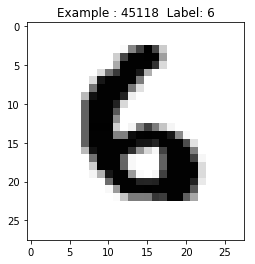

In [20]:
display_digit(ran.randint(0,x_train.shape[0]))

In [21]:
# flattened display
def display_mult_flat(start,stop):
    images=x_train[start].reshape([1,784])
    #loop
    for i in range(start+1,stop):
        images=np.concatenate((images,x_train[i].reshape([1,784])))
    plt.imshow(images,cmap=plt.get_cmap('gray_r'))
    plt.show()

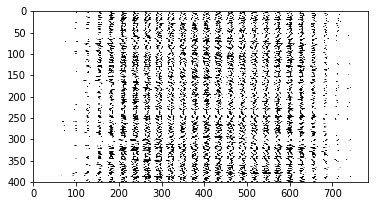

In [22]:
display_mult_flat(0,400)

## By tesorflow concept

The code creates a session instance, `sess`, using `tf.Session`. The `sess.run()` function then evaluates the tensor and returns the results.


### tf.placeholder()

`tf.placeholder()` returns a tensor that gets its value from data passed to the `tf.session.run()` function, allowing you to set the input right before the session runs.


In [23]:
import tensorflow as tf
sess=tf.Session()

In [31]:
x=tf.placeholder(tf.float32,shape=[None,784])
y=tf.placeholder(tf.float32,shape=[None,10])

In [32]:
W= tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

The `tf.Variable` class creates a tensor with an initial value that can be modified, much like a normal Python variable. This tensor stores its state in the session, so you must initialize the state of the tensor manually. You'll use the `tf.global_variables_initializer()` function to initialize the state of all the Variable tensors:

In [33]:
# Non-linearities   f(x)=softmax=is the nonlinearities of linear function(wx+b)
y_=tf.nn.softmax(tf.matmul(x,W)+b)
print(y_)

Tensor("Softmax_1:0", shape=(?, 10), dtype=float32)


In the last section, a tensor was passed into a session and it returned the result. What if we want to use a non-constant? This is where `tf.placeholder()` and `feed_dict` come into place. In this section, we'll go over the basics of feeding data into TensorFlow.

In [34]:
x_train,y_train=TRAIN_SIZE(3)
# use the initialize of the states of all the variable tensors
sess.run(tf.global_variables_initializer())
print(sess.run(y_,feed_dict={x:x_train}))

Total training images in Dataset= (55000, 784)
--------------------------------------------------------
 x_train Examples Loaded =(3, 784)
y_train Examples Loaded =(3, 10)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


In [35]:
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_),reduction_indices=[1]))
#Computes the mean of elements across dimensions of a tensor.
#reduction_indices: The old (deprecated) name for axis.

In [36]:
# Let take example of train size 5500
x_train,y_train=TRAIN_SIZE(5500)
x_test,y_test=TEST_SIZE(10000)
learning_rate=0.1
train_steps=2500

Total training images in Dataset= (55000, 784)
--------------------------------------------------------
 x_train Examples Loaded =(5500, 784)
y_train Examples Loaded =(5500, 10)
Total test images in Dataset= (10000, 784)
--------------------------------------------------------
 x_test Examples Loaded =(10000, 784)
y_test Examples Loaded =(10000, 10)


In [37]:
# initilaization
init=tf.global_variables_initializer()
sess.run(init)

In [38]:
training=tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
correct_prediction=tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
# tf.equal(x, y, name=None)   Returns the truth value of (x == y) element-wise.

# tf.cast(x, dtype, name=None)   Casts a tensor to a new type.

In [45]:
# let see the training step, accuracy, and loss
for i in range(train_steps +1):
    sess.run(training,feed_dict={x:x_train,y:y_train})  
    if i%100==0:
        print("Training step : " + str(i)+ "  Accuracy= " +
             str(sess.run(accuracy,feed_dict={x:x_test,y:y_test})) + "   Loss =" + 
             str(sess.run(cross_entropy,feed_dict={x:x_train,y:y_train})))

Training step : 0  Accuracy= 0.9067   Loss =0.23924372
Training step : 100  Accuracy= 0.9068   Loss =0.23677668
Training step : 200  Accuracy= 0.9065   Loss =0.23441288
Training step : 300  Accuracy= 0.906   Loss =0.23214433
Training step : 400  Accuracy= 0.9058   Loss =0.22996378
Training step : 500  Accuracy= 0.9059   Loss =0.22786477
Training step : 600  Accuracy= 0.9056   Loss =0.22584155
Training step : 700  Accuracy= 0.9055   Loss =0.22388892
Training step : 800  Accuracy= 0.9052   Loss =0.22200227
Training step : 900  Accuracy= 0.9052   Loss =0.22017725
Training step : 1000  Accuracy= 0.9056   Loss =0.21841015
Training step : 1100  Accuracy= 0.9059   Loss =0.21669734
Training step : 1200  Accuracy= 0.9059   Loss =0.21503574
Training step : 1300  Accuracy= 0.906   Loss =0.21342227
Training step : 1400  Accuracy= 0.9062   Loss =0.2118544
Training step : 1500  Accuracy= 0.9062   Loss =0.21032956
Training step : 1600  Accuracy= 0.906   Loss =0.2088455
Training step : 1700  Accuracy=

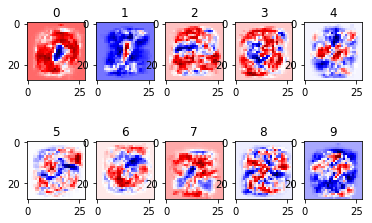

In [47]:
# plot
for i in range(10):
    plt.subplot(2,5,i+1)
    weight= sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]),cmap=plt.get_cmap('seismic'))
    frame1=plt.gca()

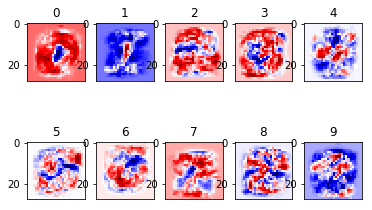

In [48]:
# plot
for i in range(10):
    plt.subplot(2,5,i+1)
    weight= sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]),cmap=plt.get_cmap('seismic'))
    frame1=plt.gca()
    frame1.axes.get_xaxis().set_visible(False)

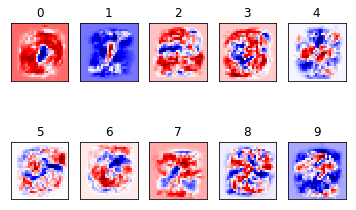

In [49]:
# plot
for i in range(10):
    plt.subplot(2,5,i+1)
    weight= sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]),cmap=plt.get_cmap('seismic'))
    frame1=plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

In [53]:
#
def display_compare(num):
    # this will load one training example
    x_train=mnist.train.images[num,:].reshape(1,784)
    y_train=mnist.train.labels[num,:]
    # This gets our label as a integer
    label=y_train.argmax()
    # this gets our prediction as a integer
    prediction=sess.run(y_,feed_dict={x: x_train}).argmax()
    plt.title("Prediction : %d  Label: %d " % (prediction,label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

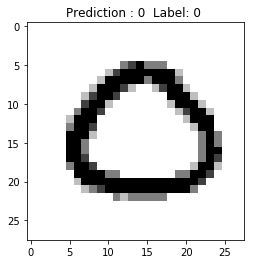

In [54]:
display_compare(ran.randint(0,55000))

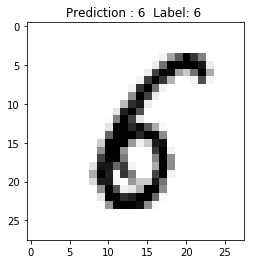

In [55]:
display_compare(ran.randint(0,55000))


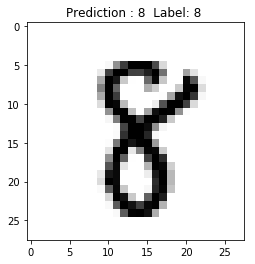

In [56]:
display_compare(ran.randint(1,55000))